In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [ ]:
import pandas as pd  #data manipulation
import numpy as np   #numerical factors
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [ ]:
df = pd.read_csv("Downloads/zomato.csv/zomato.csv.csv") #copy path file from home 
df.head() #shows the first five rows    

In [7]:
df.shape #displays the sum of rows and columns

(51717, 17)

In [54]:
df.columns #display the name of columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost2plate', 'type'],
      dtype='object')

In [55]:
df = df.drop(['url' , 'address' , 'phone' , 'menu_item' , 'dish_liked' , 'reviews_list'] , axis = 1)  # drops the mentioned rows
df.head #displays the updated table  , #axis=1 means columns and axis=0 means rows

KeyError: "['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'] not found in axis"

In [10]:
df.info() #provides info on dataset ,# actual rows = 51717 and the rows lower than this number has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [56]:
df.drop_duplicates(inplace = True) 
#removes the duplicates  , True = modifies the dataset and False = return a new dataset where the original remains unchanged
df.shape

(31674, 10)

In [57]:
df['rate'].unique() 
#checks if there are any unique values in the given column , all values are float excpet new\nan\-.

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.70014186, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [58]:
def handlerate(value): #create function to clean data
    if (value == 'NEW' or value == '-'): #mention the unique values
        return np.nan                    #if values in dataset return null
    else:
        value = str(value).split('/')    #splits the float values where \ is present
        value = value[0]                 
        return float(value)              #returns the float value without \ 

df['rate'] = df['rate'].apply (handlerate)  #applies the function
df['rate'].head()
    

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [59]:
df.rate.isnull().sum() #shows the sum of null values

0

In [60]:
df.fillna({'rate': df['rate'].mean()}, inplace=True) #a direct approach to fill null values using fillna
df['rate'].isnull().sum()

0

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31674 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          31674 non-null  object 
 1   online_order  31674 non-null  object 
 2   book_table    31674 non-null  object 
 3   rate          31674 non-null  float64
 4   votes         31674 non-null  int64  
 5   location      31674 non-null  object 
 6   rest_type     31674 non-null  object 
 7   cuisines      31674 non-null  object 
 8   cost2plate    31674 non-null  float64
 9   type          31674 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.7+ MB


In [62]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'others', 'Jayanagar', 'JP Nagar',
       'Bannerghatta Road', 'BTM', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Koramangala 4th Block', 'Bellandur',
       'Whitefield', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'St. Marks Road', 'Cunningham Road',
       'Commercial Street', 'Domlur', 'Ejipura', 'Malleshwaram',
       'Kammanahalli', 'Koramangala 6th Block', 'Brookefield',
       'Rajajinagar', 'Banaswadi', 'Kalyan Nagar', 'New BEL Road'],
      dtype=object)

In [63]:
df.location.isnull().sum() #sum of null values in location(str)

0

In [64]:
df['location'].fillna('unknown' , inplace = True) #replacing null values in strings
df['location'].isnull().sum()

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_10616\2649734691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna('unknown' , inplace = True) #replacing null values in strings


0

In [65]:
has_nulls  = df['location'].isnull().any() #checking the null values
print(f"has nulls? {has_nulls}")

has nulls? False


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31674 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          31674 non-null  object 
 1   online_order  31674 non-null  object 
 2   book_table    31674 non-null  object 
 3   rate          31674 non-null  float64
 4   votes         31674 non-null  int64  
 5   location      31674 non-null  object 
 6   rest_type     31674 non-null  object 
 7   cuisines      31674 non-null  object 
 8   cost2plate    31674 non-null  float64
 9   type          31674 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.7+ MB


In [67]:
df['rest_type'].head(10) #first 10 rows ,default 5 rows
df['rest_type'].tail(10) #firsr 10 rows ,default 5 rows

51707                others
51708    Casual Dining, Bar
51709    Casual Dining, Bar
51710                others
51711    Casual Dining, Bar
51712                others
51713                others
51714                others
51715                others
51716                others
Name: rest_type, dtype: object

In [68]:
df['rest_type'].isnull().sum()

0

In [69]:
df['rest_type'].fillna('unknown' , inplace = True) #replaced null values in column rest-type
df['rest_type'].isnull().sum()                     #sum of null values

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_10616\2550393766.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rest_type'].fillna('unknown' , inplace = True) #replaced null values in column rest-type


0

In [70]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 31674 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          31674 non-null  object 
 1   online_order  31674 non-null  object 
 2   book_table    31674 non-null  object 
 3   rate          31674 non-null  float64
 4   votes         31674 non-null  int64  
 5   location      31674 non-null  object 
 6   rest_type     31674 non-null  object 
 7   cuisines      31674 non-null  object 
 8   cost2plate    31674 non-null  float64
 9   type          31674 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.7+ MB


In [71]:
df['cuisines'].head(10) #displays first 10 rows
df['cuisines'].tail()   #dispalys last 5 rows

51712    Continental
51713    Finger Food
51714    Finger Food
51715    Finger Food
51716         others
Name: cuisines, dtype: object

In [72]:
df['cuisines'].isnull().sum() # sums the null values

0

In [73]:
df['cuisines'].fillna('unknown' , inplace = True) #replacing null values
df['cuisines'].isnull().sum()

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_10616\2535809010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cuisines'].fillna('unknown' , inplace = True) #replacing null values


0

In [74]:
has_null_cuisines = df['cuisines'].isnull().any() #checking null values
print(f"null_values = {has_null_cuisines}")

null_values = False


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31674 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          31674 non-null  object 
 1   online_order  31674 non-null  object 
 2   book_table    31674 non-null  object 
 3   rate          31674 non-null  float64
 4   votes         31674 non-null  int64  
 5   location      31674 non-null  object 
 6   rest_type     31674 non-null  object 
 7   cuisines      31674 non-null  object 
 8   cost2plate    31674 non-null  float64
 9   type          31674 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.7+ MB


In [77]:
df.dropna(inplace = True) # instant dropping null values
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [78]:
df.rename(columns =  {'approx_cost(for two people)' : 'cost2plate' , 'listed_in(type)' : 'type','listed_in(city)':'city'},inplace = True)
#rename given columns
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [80]:
df['cost2plate'].unique() #unique rows in cost2plate

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [81]:
def handlecomma (value):   #function to remove comma from values in cost2plate
    value = str(value)
    if ',' in value:
        value = value.replace(',' , '')
        return float(value)
    else:
        return float(value)

df['cost2plate'] = df['cost2plate'].apply(handlecomma) #applying function
df['cost2plate'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [82]:
df['rest_type'].value_counts() #groups and count the values

rest_type
Quick Bites           10892
Casual Dining          6951
others                 6133
Cafe                   2368
Dessert Parlor         1344
Delivery               1325
Takeaway, Delivery     1073
Casual Dining, Bar      921
Bakery                  667
Name: count, dtype: int64

In [83]:
rest_types = df['rest_type'].value_counts(ascending = False) #counts value in desc
rest_types

rest_type
Quick Bites           10892
Casual Dining          6951
others                 6133
Cafe                   2368
Dessert Parlor         1344
Delivery               1325
Takeaway, Delivery     1073
Casual Dining, Bar      921
Bakery                  667
Name: count, dtype: int64

In [84]:
rest_typeslessthan1000 = rest_types[rest_types < 1000] #displays value less than 1000
rest_typeslessthan1000

rest_type
Casual Dining, Bar    921
Bakery                667
Name: count, dtype: int64

In [85]:
def handle_value(value):                     #if values in rest_type less than 100 , will be replaced by others       
    if (value in rest_typeslessthan1000):
        return 'others'
    else:
        return value

df['rest_type'] = df['rest_type'].apply(handle_value)
df['rest_type'].value_counts()
        

rest_type
Quick Bites           10892
others                 7721
Casual Dining          6951
Cafe                   2368
Dessert Parlor         1344
Delivery               1325
Takeaway, Delivery     1073
Name: count, dtype: int64

In [86]:
rest_typesmorethan1000 = rest_types[rest_types < 1000] #displays value less than 1000
rest_typesmorethan1000

rest_type
Casual Dining, Bar    921
Bakery                667
Name: count, dtype: int64

In [87]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [88]:
df['location'].value_counts()

location
others                   3199
BTM                      2069
Whitefield               1820
Indiranagar              1658
HSR                      1603
Marathahalli             1537
Koramangala 5th Block    1417
JP Nagar                 1322
Electronic City          1219
Jayanagar                1097
Bannerghatta Road        1021
Bellandur                1000
Sarjapur Road             869
Brigade Road              610
New BEL Road              584
Banashankari              560
Kalyan Nagar              556
Malleshwaram              550
Brookefield               528
Koramangala 4th Block     519
MG Road                   518
Koramangala 7th Block     509
Koramangala 6th Block     505
Ulsoor                    491
Rajajinagar               458
Frazer Town               440
Koramangala 1st Block     435
Church Street             434
Basavanagudi              432
Banaswadi                 396
Kammanahalli              391
Residency Road            377
Lavelle Road              374
O

In [89]:
location = df['location'].value_counts(ascending = False)  # group and counts value

locationlessthan300 = location[location < 300]    #displays value less than 300


def handle_location(value):                #if values in location less than 300 replace with other 
    if (value in locationlessthan300):
        return 'others'
    else:
        return value

df['location'] = df['location'].apply(handle_location)   #applying the function
df['location'].value_counts()                  #values after using the function

location
others                   4705
BTM                      2069
Whitefield               1820
Indiranagar              1658
HSR                      1603
Marathahalli             1537
Koramangala 5th Block    1417
JP Nagar                 1322
Electronic City          1219
Jayanagar                1097
Bannerghatta Road        1021
Bellandur                1000
Sarjapur Road             869
Brigade Road              610
New BEL Road              584
Banashankari              560
Kalyan Nagar              556
Malleshwaram              550
Brookefield               528
Koramangala 4th Block     519
MG Road                   518
Koramangala 7th Block     509
Koramangala 6th Block     505
Ulsoor                    491
Rajajinagar               458
Frazer Town               440
Koramangala 1st Block     435
Church Street             434
Basavanagudi              432
Banaswadi                 396
Kammanahalli              391
Residency Road            377
Lavelle Road              374
O

In [90]:
cuisines = df['cuisines'].value_counts(ascending = False)   #values in cuisines desc

cuisineslessthan100 = cuisines[cuisines < 100]       #values less than 100

def handle_cuisines(value):                        #if values in cuisines less than 100 replace with other
    if (value in cuisineslessthan100):
        return 'others'
    else:
        return value

df['cuisines'] = df['cuisines'].apply(handle_cuisines)   #applying function
df['cuisines'].value_counts()                              #value count after function

cuisines
others                                              18525
North Indian                                         1715
North Indian, Chinese                                1386
South Indian                                         1071
Bakery, Desserts                                      542
Biryani                                               510
Fast Food                                             424
South Indian, North Indian, Chinese                   422
Cafe                                                  386
Desserts                                              385
Bakery                                                343
Chinese                                               308
Ice Cream, Desserts                                   277
Mithai, Street Food                                   236
Chinese, North Indian                                 220
North Indian, Chinese, Biryani                        215
Desserts, Ice Cream                                   210
North

In [91]:
df['type'].value_counts()   

type
Delivery              14468
Dine-out              11765
Desserts               2228
Cafes                  1155
Drinks & nightlife      867
Buffet                  620
Pubs and bars           571
Name: count, dtype: int64

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

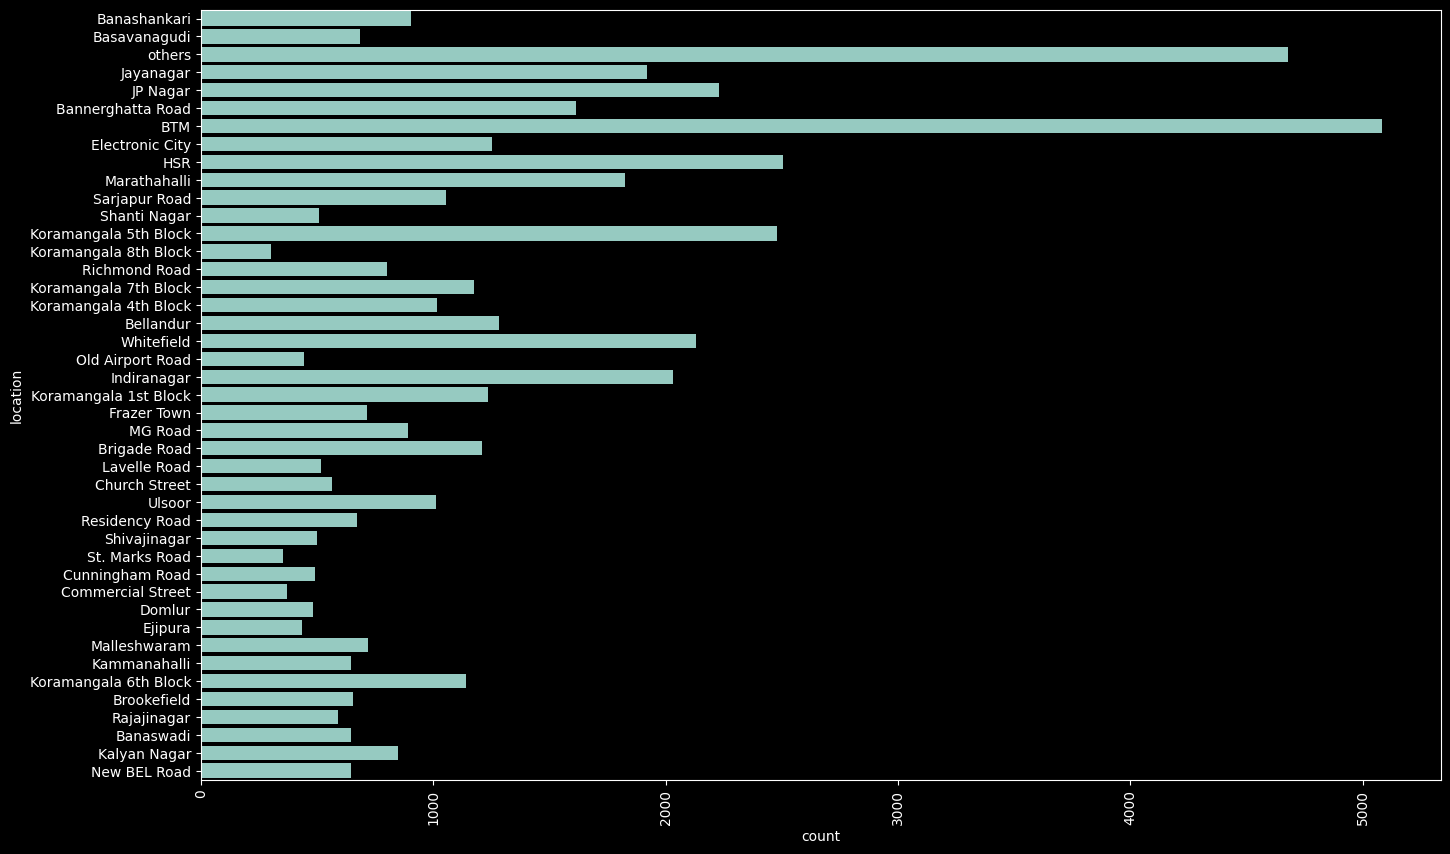

In [47]:
plt.figure(figsize = (16,10))   # imports a figure with length 16 and width 10
ax = sns.countplot(df['location'])  #countplot = barchart , to show the graph about location
plt.xticks(rotation = 90)          #rotates  x axis 90 degree to avoid overlapping

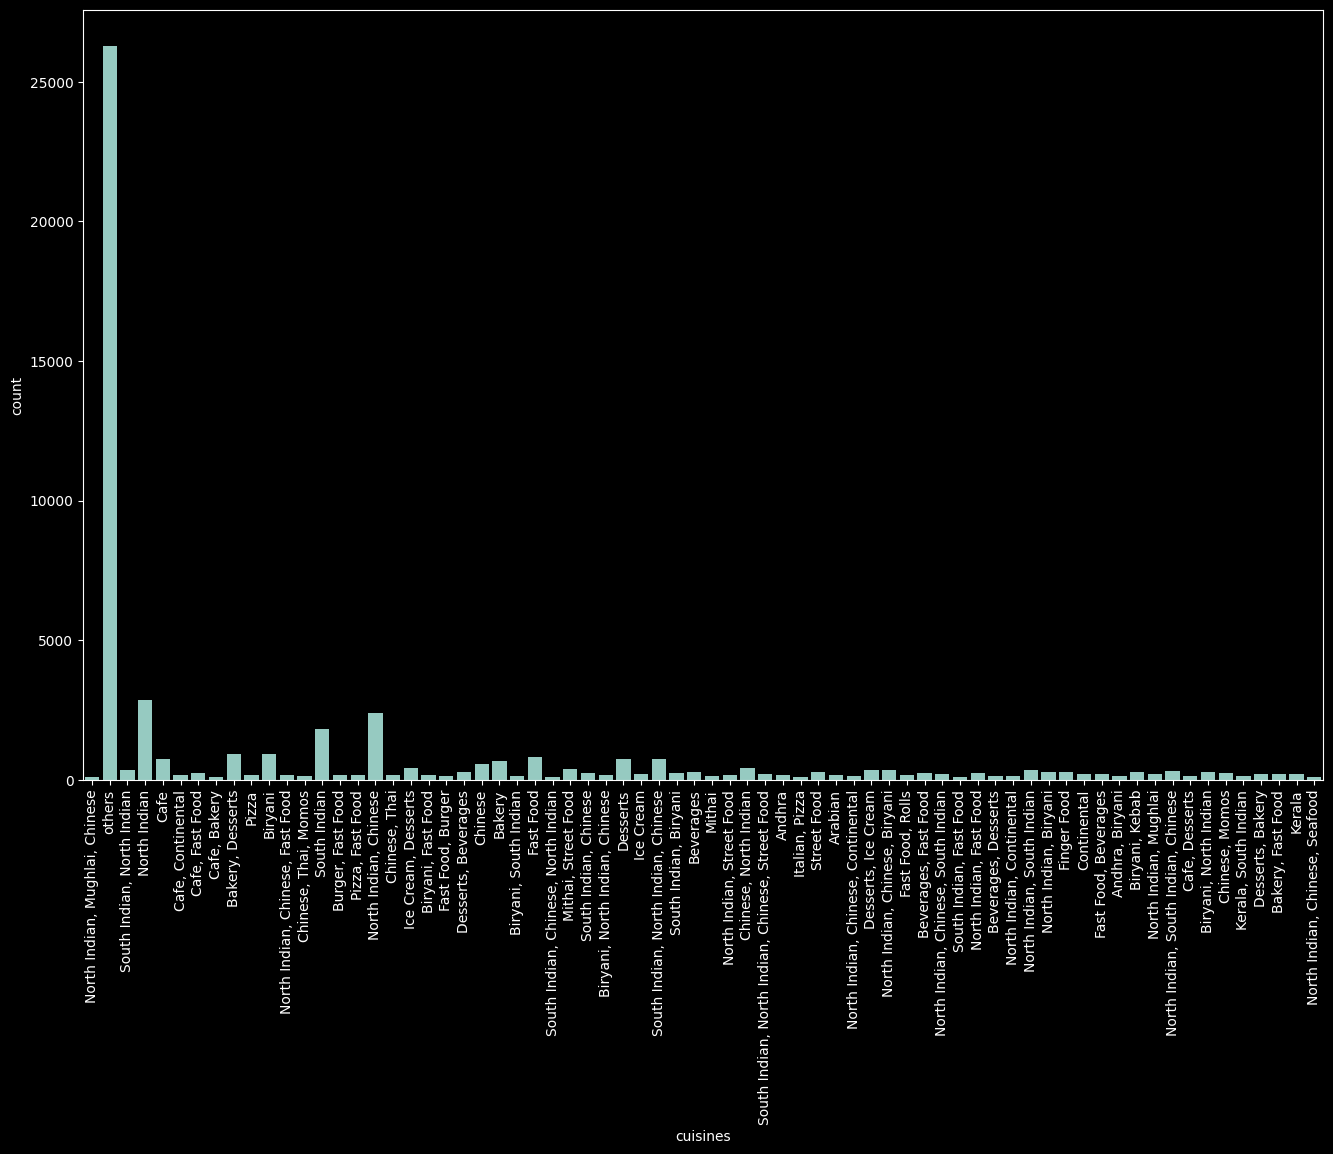

In [48]:
plt.figure(figsize = (16 , 10))
ax = sns.countplot(x=df['cuisines'])
plt.xticks(rotation = 90)
plt.show()
                  

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_10616\2217380187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['online_order'] , palette = 'inferno')


<Axes: xlabel='count', ylabel='online_order'>

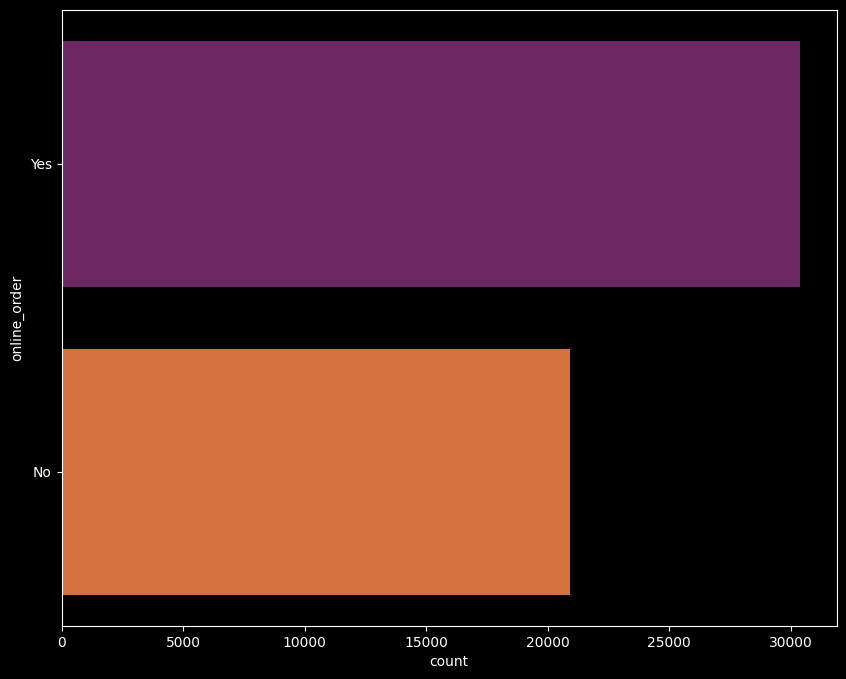

In [49]:
plt.figure(figsize = (10 , 8))
sns.countplot(df['online_order'] , palette = 'inferno')
           

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_10616\908692548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['book_table'] , palette = 'rainbow')


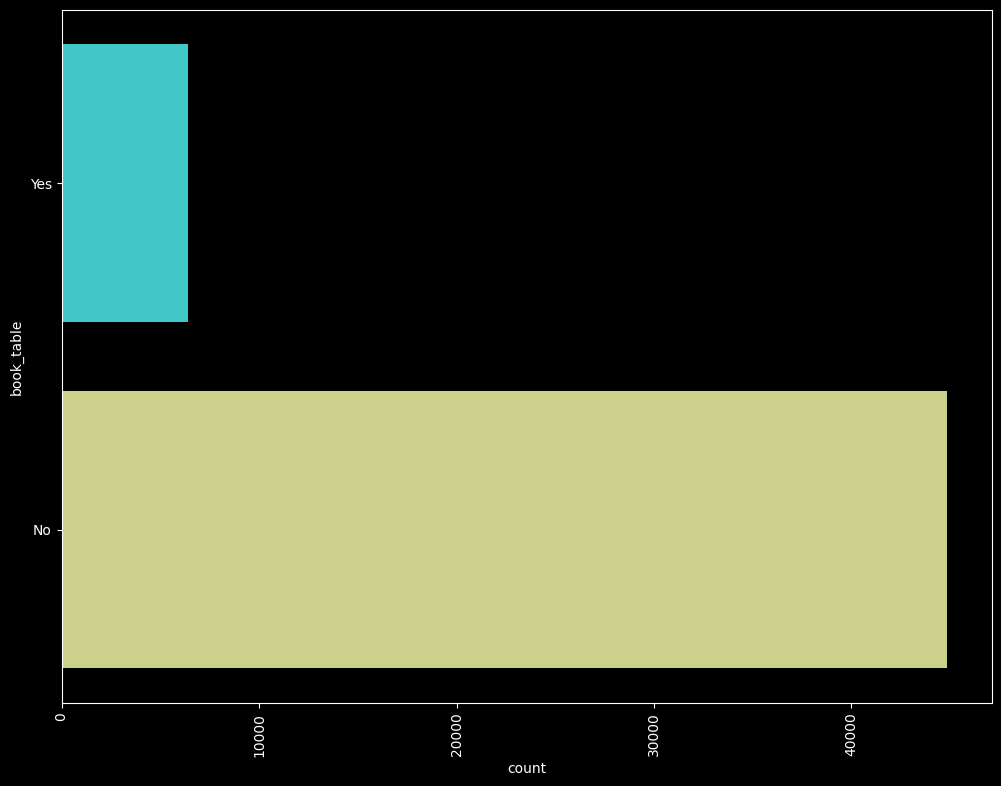

In [50]:
plt.figure(figsize = (12,9))
sns.countplot(df['book_table'] , palette = 'rainbow')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='online_order', ylabel='rate'>

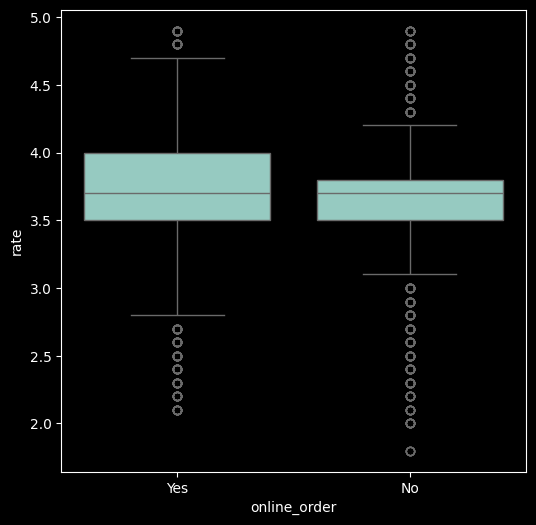

In [51]:
plt.figure(figsize = (6 , 6))
sns.boxplot(x = 'online_order' , y = 'rate' , data = df)

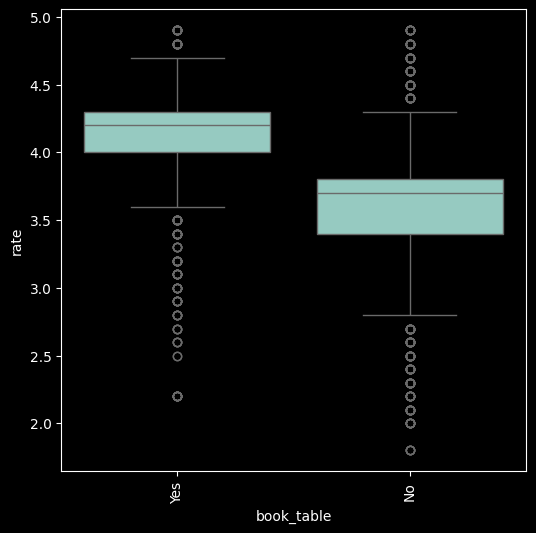

In [52]:
plt.figure(figsize =( 6 , 6))
sns.boxplot(x = 'book_table' , y = 'rate' , data  = df)
plt.xticks(rotation = 90)
plt.show()


In [113]:
df1 = df.groupby(['location' , 'online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = df1.pivot_table(values = None , index = ['location'] , columns = ['online_order'] , fill_value = 0 , aggfunc = np.sum)
df1               

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_10616\436156288.py:4: FutureWarning: The provided callable <function sum at 0x00000261561F02C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = df1.pivot_table(values = None , index = ['location'] , columns = ['online_order'] , fill_value = 0 , aggfunc = np.sum)


name      
online_order             No   Yes
location                         
BTM                     626  1443
Banashankari            253   307
Banaswadi               184   212
Bannerghatta Road       388   633
Basavanagudi            167   265
Bellandur               368   632
Brigade Road            260   350
Brookefield             165   363
Church Street           176   258
Electronic City         659   560
Frazer Town             197   243
HSR                     418  1185
Indiranagar             603  1055
JP Nagar                516   806
Jayanagar               338   759
Kalyan Nagar            222   334
Kammanahalli            158   233
Koramangala 1st Block   118   317
Koramangala 4th Block   246   273
Koramangala 5th Block   516   901
Koramangala 6th Block   174   331
Koramangala 7th Block   146   363
Lavelle Road            225   149
MG Road                 263   255
Malleshwaram            218   332
Marathahalli            583   954
New BEL Road            250   334
Old Airport Road        174   177
Rajajinagar             211   247
Residency Road          248   129
Richmond Road           201   118
Sarjapur Road           262   607
Ulsoor                  174   317
Whitefield              807  1013
others                 2020  2685

<Axes: xlabel='location'>

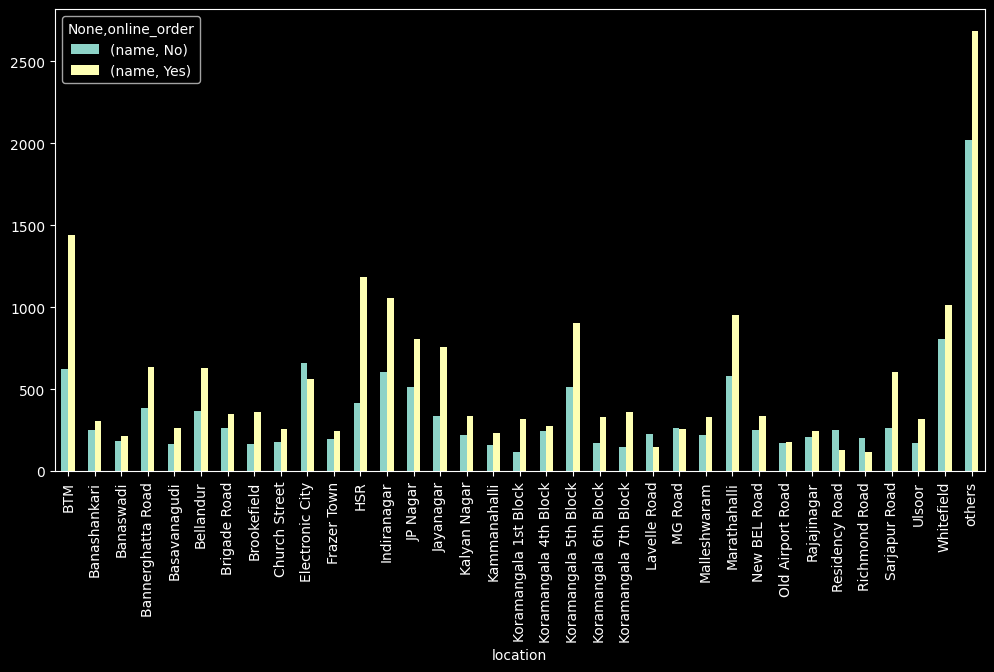

In [114]:
df1.plot(kind = 'bar' , figsize = (12,6))

In [110]:
df2 = df.groupby(['book_table' , 'location']) ['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2 , values = None , index = ['location'] ,columns = ['book_table'], fill_value = 0 , aggfunc = np.sum)
df2

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_10616\2818353432.py:4: FutureWarning: The provided callable <function sum at 0x00000261561F02C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2 , values = None , index = ['location'] ,columns = ['book_table'], fill_value = 0 , aggfunc = np.sum)


name     
book_table               No  Yes
location                        
BTM                    1955  114
Banashankari            517   43
Banaswadi               390    6
Bannerghatta Road       943   78
Basavanagudi            424    8
Bellandur               907   93
Brigade Road            469  141
Brookefield             455   73
Church Street           269  165
Electronic City        1123   96
Frazer Town             432    8
HSR                    1426  177
Indiranagar            1225  433
JP Nagar               1072  250
Jayanagar               886  211
Kalyan Nagar            440  116
Kammanahalli            357   34
Koramangala 1st Block   393   42
Koramangala 4th Block   281  238
Koramangala 5th Block   833  584
Koramangala 6th Block   429   76
Koramangala 7th Block   384  125
Lavelle Road            173  201
MG Road                 254  264
Malleshwaram            469   81
Marathahalli           1383  154
New BEL Road            529   55
Old Airport Road        294   57
Rajajinagar             418   40
Residency Road          262  115
Richmond Road           241   78
Sarjapur Road           724  145
Ulsoor                  386  105
Whitefield             1574  246
others                 4106  599

<Axes: xlabel='location'>

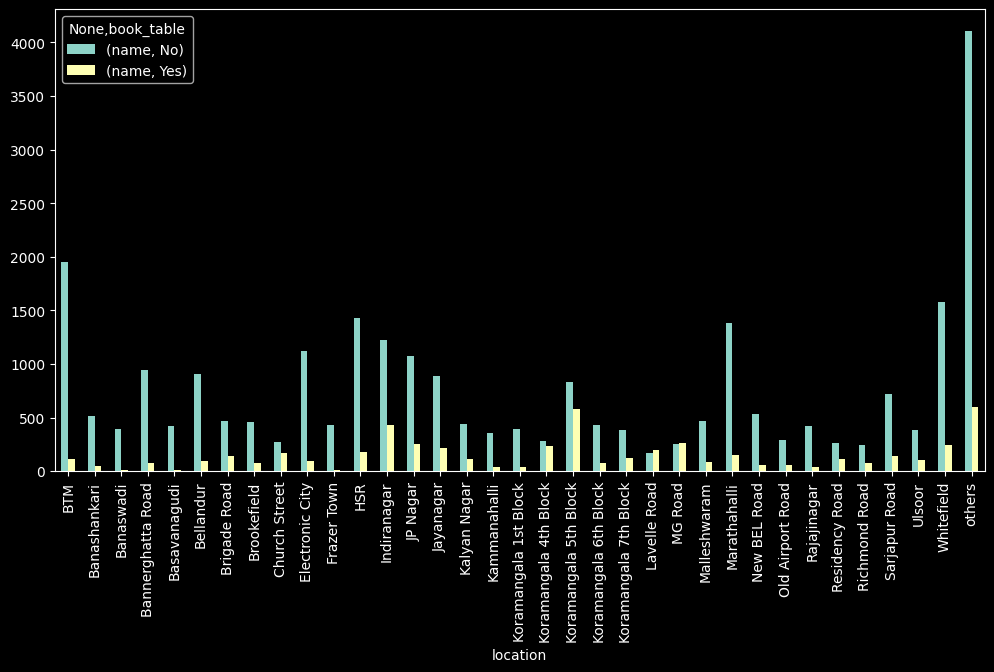

In [116]:
df2.plot(kind = 'bar' , figsize =  (12,6))

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_10616\244314149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'type' , y = 'rate' , data = df , palette = 'inferno')


<Axes: xlabel='type', ylabel='rate'>

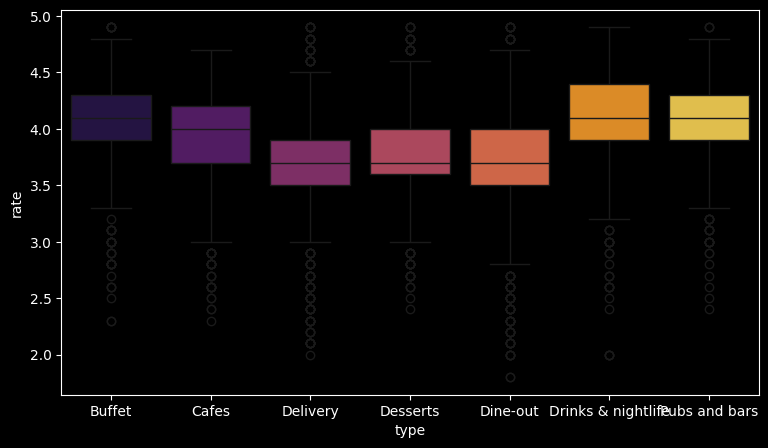

In [122]:
plt.figure(figsize = (9, 5))
sns.boxplot(x = 'type' , y = 'rate' , data = df , palette = 'inferno') 

In [124]:
df3 = df.groupby(['location' , 'type']) ['name'].count()
df3.to_csv('location_type.csv')
df3 = pd.read_csv('location_type.csv')
df3 = pd.pivot_table(df3 , values = None , index = ['location'] , columns = ['type'] , fill_value = 0 , aggfunc = np.sum)
df3

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_10616\1009421428.py:4: FutureWarning: The provided callable <function sum at 0x00000261561F02C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 = pd.pivot_table(df3 , values = None , index = ['location'] , columns = ['type'] , fill_value = 0 , aggfunc = np.sum)


name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       14    37     1160       99      734   
Banashankari               5    24      241       46      237   
Banaswadi                  0    13      159       19      200   
Bannerghatta Road          8    27      499       89      387   
Basavanagudi               3     8      185       45      189   
Bellandur                 24    31      459       60      396   
Brigade Road              11    23      216       46      243   
Brookefield                6    17      266       38      197   
Church Street             19    43      134       19      168   
Electronic City           22    24      551       71      509   
Frazer Town                1    10      243       44      138   
HSR                       14    42      966      107      446   
Indiranagar               38    92      778      128      495   
JP Nagar                  25    41      615      100      494   
Jayanagar                 18    50      492      111      414   
Kalyan Nagar               9    24      189       45      274   
Kammanahalli               2    14      158       18      196   
Koramangala 1st Block      3    12      245       25      136   
Koramangala 4th Block     10    36      203       34      158   
Koramangala 5th Block     48   106      527      110      494   
Koramangala 6th Block     11    25      211       37      178   
Koramangala 7th Block     18    22      193       50      184   
Lavelle Road              24    19       80       22      152   
MG Road                   30    53      128       33      206   
Malleshwaram              11    24      195       61      229   
Marathahalli              33    27      803       89      563   
New BEL Road               4    29      278       34      223   
Old Airport Road          11     5      147       29      138   
Rajajinagar                9     4      195       43      194   
Residency Road            13    17       94       34      164   
Richmond Road             31    11       89       30      148   
Sarjapur Road             21    19      433       71      284   
Ulsoor                    12    29      196       31      195   
Whitefield                26    48      873      117      682   
others                    86   149     2267      293     1720   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   13            12  
Banashankari                           7             0  
Banaswadi                              4             1  
Bannerghatta Road                      9             2  
Basavanagudi                           2             0  
Bellandur                             16            14  
Brigade Road                          50            21  
Brookefield                            4             0  
Church Street                         30            21  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            14  
Indiranagar                           63            64  
JP Nagar                              40             7  
Jayanagar                             12             0  
Kalyan Nagar                          15             0  
Kammanahalli                           3             0  
Koramangala 1st Block                  5             9  
Koramangala 4th Block                 48            30  
Koramangala 5th Block                 74            58  
Koramangala 6th Block                 25            18  
Koramangala 7th Block                 21            21  
Lavelle Road                          50            27  
MG Road                               42            26  
Malleshwaram  

<Axes: xlabel='location'>

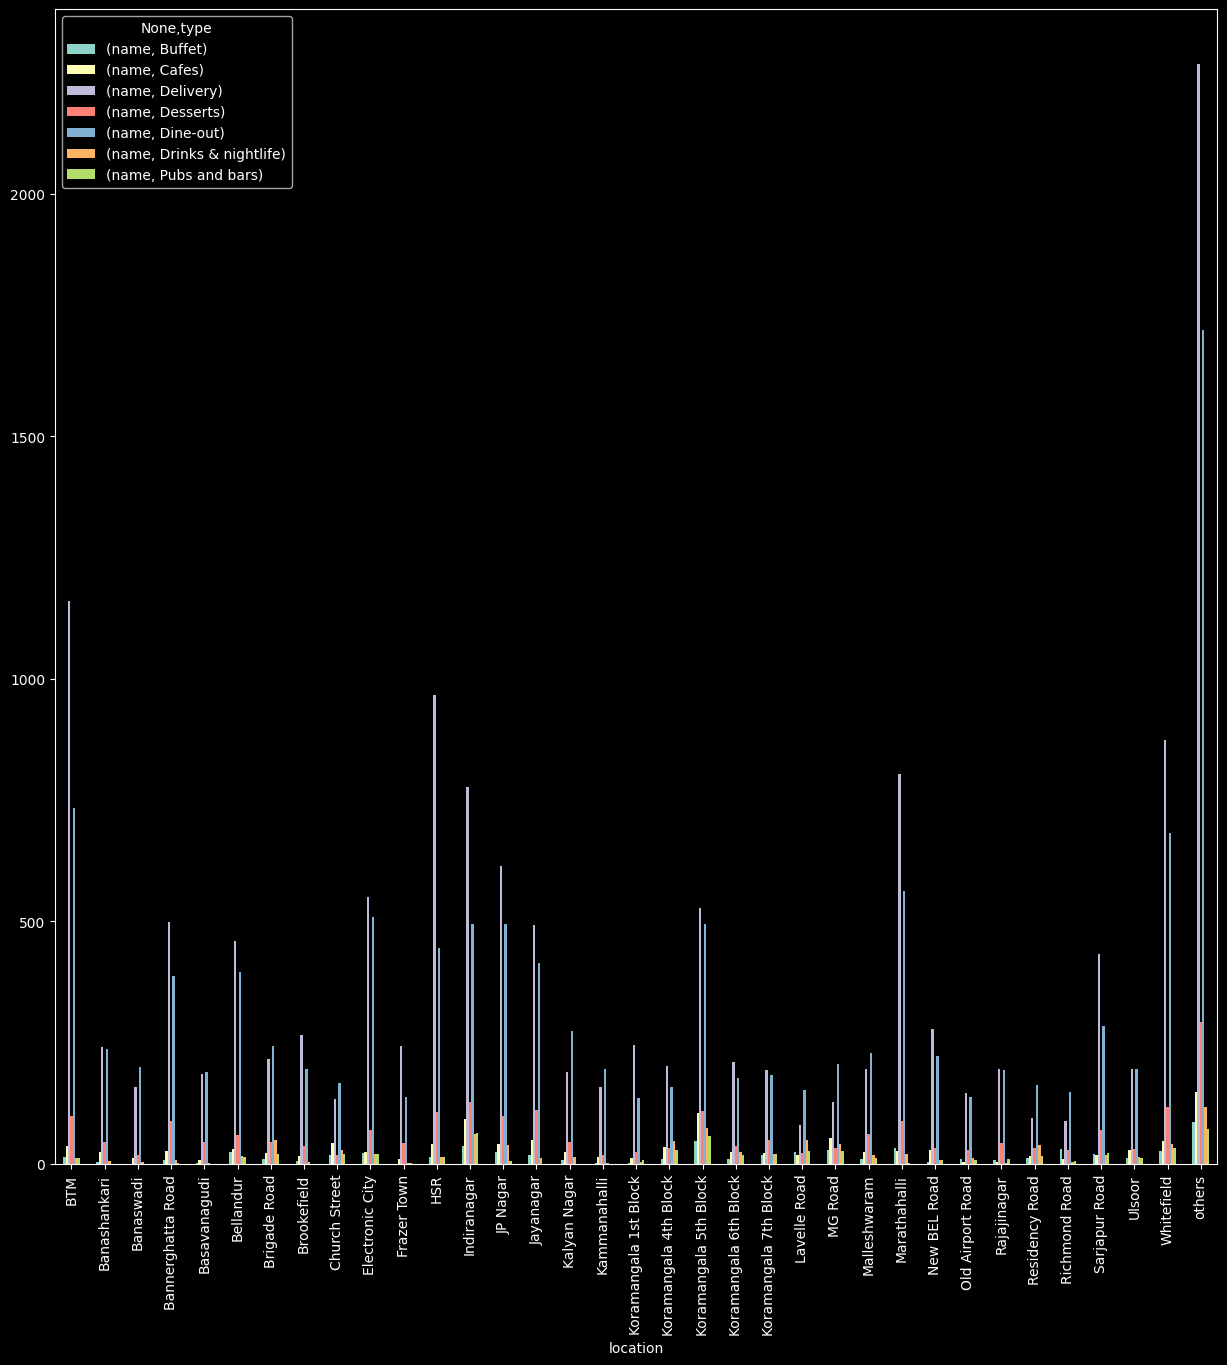

In [128]:
df3.plot(kind = 'bar' , figsize = (15 , 15))

In [134]:
df4 = df[['location' , 'votes']].copy()
df4 = df4.drop_duplicates()
df5 = df4.groupby('location') ['votes'].sum().reset_index()
df5 = df5.sort_values('votes' , ascending = False)
df5.head()


,location,votes
19,Koramangala 5th Block,1063061
12,Indiranagar,648886
34,others,443157
8,Church Street,291543
18,Koramangala 4th Block,282003


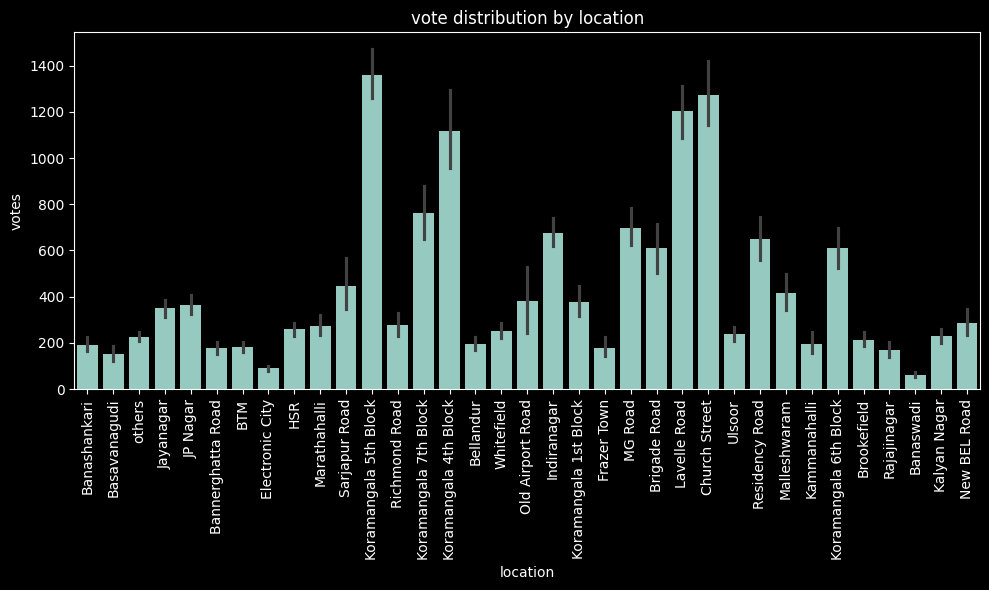

In [138]:
plt.figure(figsize = (10, 6))
sns.barplot(x=df['location'] , y=df['votes'])
plt.xticks(rotation = 90)
plt.title('vote distribution by location')
plt.xlabel('location')
plt.ylabel('votes')
plt.tight_layout()
plt.show()

In [141]:
df6 = df[['cuisines' , 'votes']].copy()
df6 = df6.drop_duplicates()
df7 = df6.groupby('cuisines') ['votes'].sum().reset_index()
df7= df7.sort_values('votes' , ascending = False)
df7.head()

,cuisines,votes
49,others,4031215
30,North Indian,242871
42,South Indian,87286
32,"North Indian, Chinese",82290
37,"North Indian, Mughlai",65813


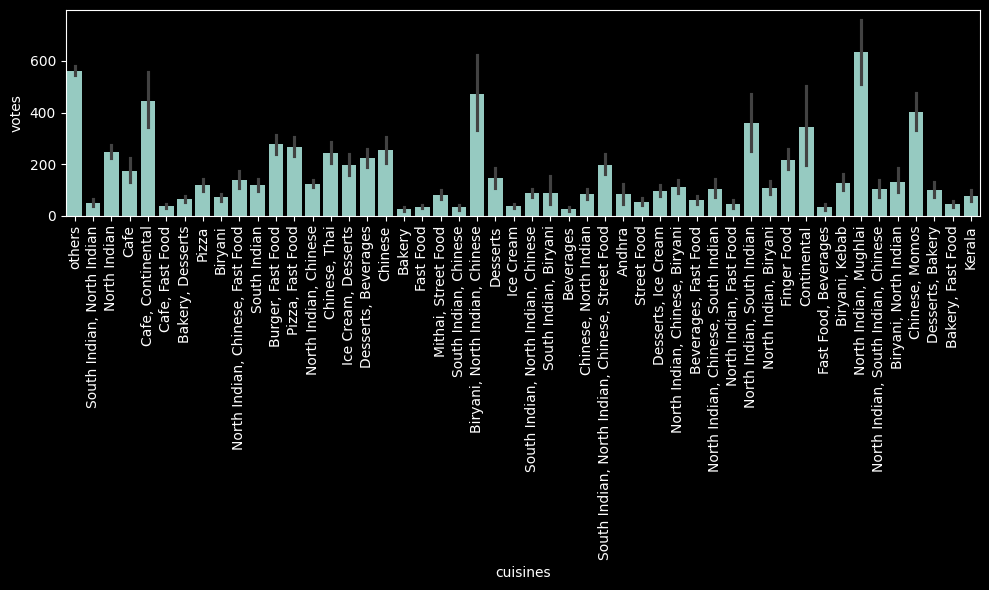

In [142]:
plt.figure(figsize = (10 , 6))
sns.barplot(x = df['cuisines'] , y=df['votes'])
plt.xticks(rotation = 90)
plt.xlabel('cuisines')
plt.ylabel('votes')
plt.tight_layout()
plt.show()
